<a href="https://colab.research.google.com/github/vannicc/CCMACLRL_EXERCISES_COM222-ML/blob/main/Exercise3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 3

Create a model using K-Nearest Neigbors to perform classification using the personality dataset.

0 -'introvert'

1 - 'extrovert'

## A. Import libraries

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## B. Load and understand the dataset

In [23]:
# put your answer here
df = pd.read_excel('personality.xlsx')
df.head()

,Name,Post/Share Frequently?,Active in social media?,Replies to comments?,Number of friends/followers,Personality
0,Franze Natividad,1,1,1,2819,0
1,Jessy Mapanao,1,0,1,1989,1
2,Gian Colinares,1,0,1,2252,1
3,Blix Foryasen,1,1,1,4290,1
4,Rovic Mathew Bagadiong,1,0,1,1987,1


1. Display the summary of all the features of the dataset using `.info()`

In [26]:
# put your answer here
df.drop(columns='Name', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Post/Share Frequently?       50 non-null     int64
 1   Active in social media?      50 non-null     int64
 2   Replies to comments?         50 non-null     int64
 3   Number of friends/followers  50 non-null     int64
 4   Personality                  50 non-null     int64
dtypes: int64(5)
memory usage: 2.1 KB


2. Display the total number of samples from each label using `.value_counts()`

In [28]:
# put your answer here
df['Personality'].value_counts()


,count
Personality,
1,28
0,22


## C. Split the dataset into training and test set

3. Convert the features into an numpy array using `.values()` and store it in a variable "X"

In [29]:
# put your answer here
X = df.drop(columns='Personality').values

4. Convert the labels into an numpy array using `.values()` and store it in a variable "y"

In [30]:
# put your answer here
y = df['Personality'].values

5. Use `train_test_split()` to split the data.

- Declare a variable `X_train` that will hold the training data
- Declare a variable `X_test` that will hold the test data
- Declare a variable `y_train` that will hold the label of the training data
- Declare a variable `y_test` that will hold the label of the test data


In [31]:
# put your answer here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(40, 4)
(40,)
(10, 4)
(10,)


## D. Create the model

6. Use KNN as a classifier by using `KNeighborsClassifier()`

In [73]:
# put your answer here
knn = KNeighborsClassifier(n_neighbors=1)

7. Train the model using the `.fit()`

In [74]:
# put your answer here
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

8. Test the model using the `.predict()`

In [75]:
# put your answer here
y_pred = knn.predict(X_test)

## Evaluate the model

9. Create a confusion matrix

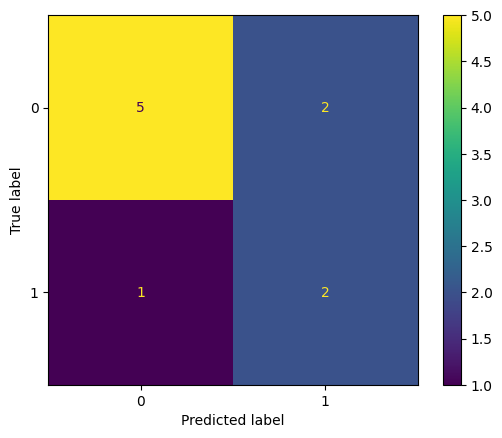

In [76]:
# put your answer here
conf_matrix = confusion_matrix(y_pred, y_test, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=knn.classes_)
disp.plot()


10. Display the accuracy

In [77]:
# put your answer here
sklearn.metrics.accuracy_score(y_test, y_pred)

0.7

11. Display the precision

In [78]:
# put your answer here
precision = precision_score(y_test, y_pred, average=None)
print("Precision:", precision)

Precision: [0.71428571 0.66666667]


12. Display the recall

In [79]:
# put your answer here
recall = recall_score(y_test, y_pred, average=None)
print("Recall:", recall)

Recall: [0.83333333 0.5       ]


13. Display the f1-score

In [80]:
# put your answer here
f1 = f1_score(y_test, y_pred, average=None)
print("f1-score:", f1)

f1-score: [0.76923077 0.57142857]


In [82]:
#test
print(sklearn.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.67      0.50      0.57         4

    accuracy                           0.70        10
   macro avg       0.69      0.67      0.67        10
weighted avg       0.70      0.70      0.69        10



In [88]:
#predict
knn.predict([[1,0,0,100]])

array([0])

In [89]:
knn.predict([[1,1,0,3124]])

array([1])